<a href="https://colab.research.google.com/github/azam26/OIBSIP/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [2]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 5)

In [10]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**Visulaising The dataset**

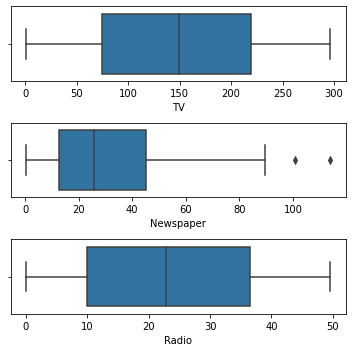

In [14]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

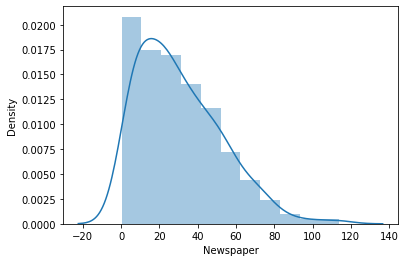

In [15]:
sns.distplot(df['Newspaper'])

In [16]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [17]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [18]:
data = df.copy()

In [19]:
data.loc[data['Newspaper']>=93, 'Newspaper'] = 93

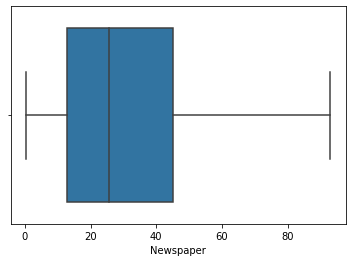

In [20]:
sns.boxplot(data['Newspaper'])

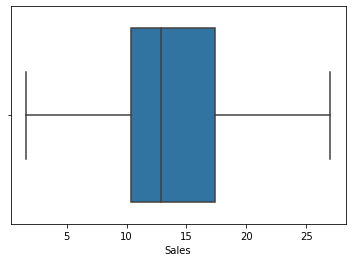

In [21]:
sns.boxplot(data['Sales'])

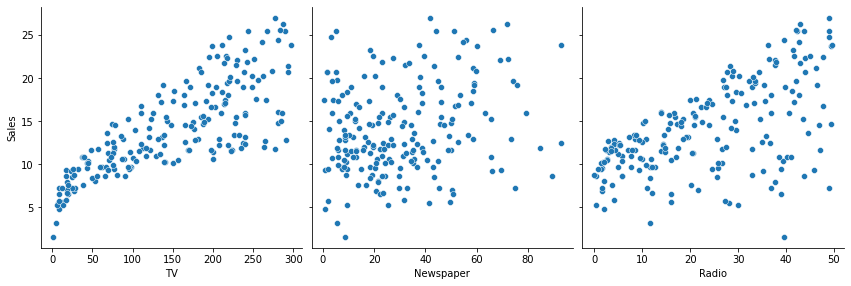

In [22]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars='Sales', height = 4, aspect= 1, kind='scatter')
plt.show()

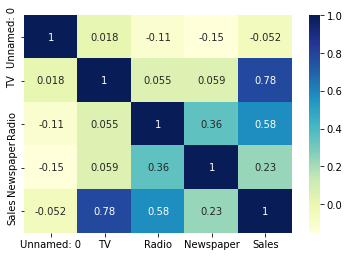

In [23]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [24]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [25]:
print(important_features)

['TV', 'Radio', 'Sales']


In [26]:
x = data['TV']
y = data['Sales']

In [27]:
x= x.values.reshape(-1,1)

In [28]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [30]:
print(x.shape, y.shape)

(200, 1) (200,)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [32]:
print(x_train.shape, y_train.shape)

(134, 1) (134,)


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [34]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [35]:
knn_train_pred = knn.predict(x_train)

In [36]:
knn_test_pred = knn.predict(x_test)

In [37]:
print(knn_train_pred, knn_train_pred)

[ 7.86 12.1   7.86 15.1  19.2  11.44 15.52 19.44 11.28  7.86  7.94 14.6
 16.2  14.04 14.2  19.24 18.44 11.28 14.2   4.76 19.3  11.44 18.54 20.82
  9.8  11.12 11.44 18.78 16.64 11.88 16.52 10.76 15.14 10.92  7.86 19.24
 11.04  9.94  8.4  15.14 19.38 11.88 16.64 19.64 19.38 10.06 16.64 10.94
 17.5  18.78 14.2  15.48 11.12 14.96 11.28 19.44 20.78 18.72 18.1  15.2
 19.38 15.52 11.74  8.32 12.08 19.2  10.34 14.42 18.72  9.76 14.08 16.2
  9.64 16.34 10.6  14.96 19.22 18.56 14.08  9.18 16.42 16.2  20.68 16.58
 18.54  9.94 12.1   7.94 19.44  4.76 18.54  8.32  8.66 10.94 12.1  11.38
 17.44  9.56 16.42 18.72  4.76 11.12 14.36 20.82 11.44 14.08 19.72  8.32
 20.82  4.76 15.76 19.2  17.38 11.04 10.2  14.6  15.52 18.72 16.92 16.62
 14.88 12.08 10.6  10.94 16.64 15.36 16.98 21.24 10.06  7.86 12.78 10.62
 18.54 16.62] [ 7.86 12.1   7.86 15.1  19.2  11.44 15.52 19.44 11.28  7.86  7.94 14.6
 16.2  14.04 14.2  19.24 18.44 11.28 14.2   4.76 19.3  11.44 18.54 20.82
  9.8  11.12 11.44 18.78 16.64 11.88 16.5

In [41]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [42]:
svr_train_pred = svr.predict(x_train)
svr_test_predict =  svr.predict(x_test)


In [43]:
print(svr_train_pred,svr_test_predict)

[ 8.82885335 10.33844123  8.79973318 13.14263968 18.0265016  10.11663818
 18.04237629 17.83357961 10.08929628  8.82018237  8.9433992  13.49275059
 18.0168954  12.78681078 14.47110286 16.71817286 18.07463837 10.03850096
 14.46378231  8.74868029 17.85177232 10.10978612 17.50189671 16.64474703
  9.31463645 11.1504908  10.16491657 17.97179245 16.9903785  10.26317661
 18.07138    10.91936629 15.80655172 11.07031792  8.81076202 16.75143602
 10.37113118  9.18895977  8.97708755 15.61278496 16.92935585 10.30960458
 17.02129534 18.002459   16.95215583  9.45830219 16.83544145 11.57476697
 17.97937639 17.97806559 14.5956068  18.06181847 11.08355683 16.00253527
 10.06890506 17.86233576 17.92017534 18.07475862 17.26478065 14.28832781
 17.02331887 18.03555012 12.01605789  8.92213832 12.1927572  18.01865489
 11.36855245 13.61204212 18.07329279  9.15741945 13.70402203 18.0168954
  9.61090521 17.15540441  9.35779627 16.08204852 17.99143576 17.04578976
 13.8538437   9.7997332  17.57879578 18.02006564 17.

In [44]:
import statsmodels.api as sm

In [45]:
x_train_constant = sm.add_constant(x_train)

In [46]:
model = sm.OLS(y_train, x_train_constant).fit()

In [47]:
model.params

const    7.332011
x1       0.045593
dtype: float64

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     185.1
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           6.86e-27
Time:                        12:22:23   Log-Likelihood:                -351.21
No. Observations:                 134   AIC:                             706.4
Df Residuals:                     132   BIC:                             712.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3320      0.576     12.733      0.0

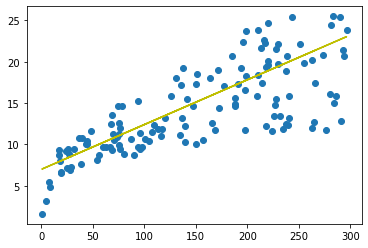

In [49]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [50]:
y_train_pred= model.predict(x_train_constant)
res =  (y_train - y_train_pred)
res

119   -1.616507
191   -0.874251
75     0.597474
64     4.690802
142    2.714826
         ...   
2      1.183796
7      0.387761
125   -0.707684
96    -4.641104
33    -2.041399
Name: Sales, Length: 134, dtype: float64

In [51]:
y_train_pred

array([ 8.21650725, 10.77425073,  8.10252581, 13.30919792, 17.38517416,
       10.48701751, 18.15568869, 16.88821509, 10.45054345,  8.18459245,
        8.55389231, 13.54172006, 18.27878864, 13.06299802, 14.16177908,
       20.58577295, 17.82286289, 10.38215458, 14.15721982,  7.36392609,
       18.77118845, 10.47789899, 16.40949305, 20.68607662,  9.29705129,
       11.69522075, 10.55084711, 17.1982446 , 15.89429695, 10.67850632,
       17.91404804, 11.4535801 , 15.00980098, 11.61315412,  8.14811839,
       20.54018038, 10.81528405,  9.07364767,  8.63595895, 14.88214177,
       20.29398047, 10.73777667, 15.92165249, 17.29398901, 20.26206567,
        9.53413268, 15.76207848, 12.10099468, 18.42012562, 17.21648163,
       14.23928646, 18.02347022, 11.62683189, 15.14201945, 10.4231879 ,
       16.94292618, 17.06602613, 17.79550734, 19.81069917, 14.04779764,
       20.161762  , 18.19216275, 12.47941305,  8.49918122, 12.62075003,
       17.35325936, 11.90950586, 13.61922744, 17.72711848,  9.01

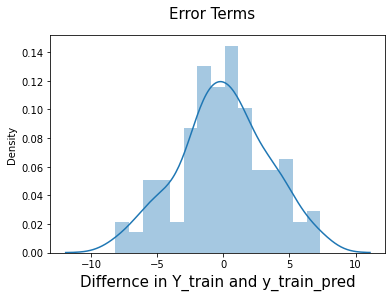

In [53]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Differnce in Y_train and y_train_pred', fontsize = 15)
plt.show()

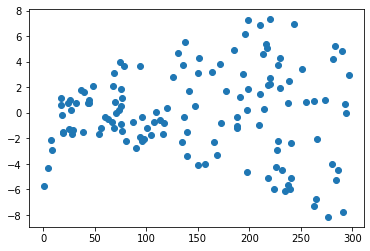

In [54]:
plt.scatter(x_train, res)
plt.show()

In [58]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [59]:
y_pred

array([15.09186762, 17.15265203, 18.65720701, 17.06146688, 17.28942975,
       12.33807607, 16.44140785, 10.81528405, 12.37910938, 18.90340692,
       11.76360962, 10.34568052, 16.5645078 ,  7.92927403,  9.95358437,
       13.23169054, 13.33655347, 16.14049685, 14.83198994,  9.06452915,
       20.10705091,  7.71498892, 13.84719031,  8.11620359, 19.50066966,
       18.35173676, 12.94445732, 16.76511514,  9.29249203,  7.68763338,
        7.93383329, 16.44140785, 11.239295  , 14.77727885,  8.22562577,
       18.67544404,  8.47638493,  7.5782112 ,  9.61164006, 15.76207848,
       13.72864962, 12.84871291, 17.47180005, 17.47180005, 16.67848924,
       16.63745593, 15.40189713, 15.57514892, 15.34262678,  8.18915171,
       15.65721555, 15.31527124,  7.7286667 , 13.68305704, 12.82591662,
       20.44443597, 16.76055588, 18.24231458, 19.24535124, 14.93685286,
       12.01436878, 11.4216653 , 19.95659541, 18.26967012, 11.3578357 ,
        7.86544442])

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.0773793829561114

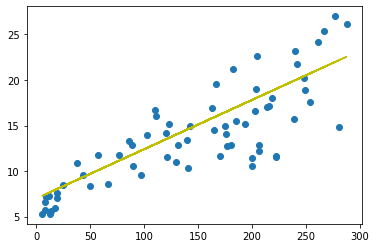

In [65]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 6.9955 + 0.0541 *  x_test, 'y')
plt.show()